In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 런타임 다시 시작


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [63]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
# 데이터 불러오기
df = pd.read_excel("/content/drive/MyDrive/BDA/part4/시도별 전출입 인구수.xlsx",
                   header = 0, engine = "openpyxl")
print(df.head())
# NaN 값을 채우기
df = df.fillna(method = "ffill")
# 서울시에서 다른 지역으로 이동한 데이터
# 전출지별 == 서울시 & 전입지별 != 서울시
b_ind = (df["전출지별"] == "서울특별시") & (df["전입지별"] != "서울특별시")
# 불리언 인덱스로 데이터 추출 = 조건을 만족하는 행
df_seoul = df[b_ind]
# 열 삭제
df_seoul = df_seoul.drop("전출지별", axis = 1)

# 열 이름 변경
df_seoul.rename({"전입지별":"전입지"}, axis = 1, inplace = True)
print(df_seoul)

# 행 인덱스 변경
df_seoul.set_index("전입지", inplace = True)
print(df_seoul)

   전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2   NaN  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3   NaN  부산광역시    448577    389797    362202    482061    680984    805979   
4   NaN  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2008      2009      2010      2011      2012  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8808256   8487275   8226594   8127195   7506691   
2   2756510   2893403  ...   2025358   1873188   1733015   1721748   1555281   
3    724664    785117  ...    514502    519310    519334    508043    461042   
4         -         -  ...    409938    398626    370817    370563    348642   

       2013      2014      2015      2016      201

In [64]:
# 한글 폰트 지정
plt.rc("font",family="NanumGothic")

## 화면 분할

<ipython-input-65-81416b230b2a>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation = 90)
<ipython-input-65-81416b230b2a>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation = 90)
<ipython-input-65-81416b230b2a>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation = 90)


Text(0.5, 1.0, '서울시에서 제주로 이동한 인구')

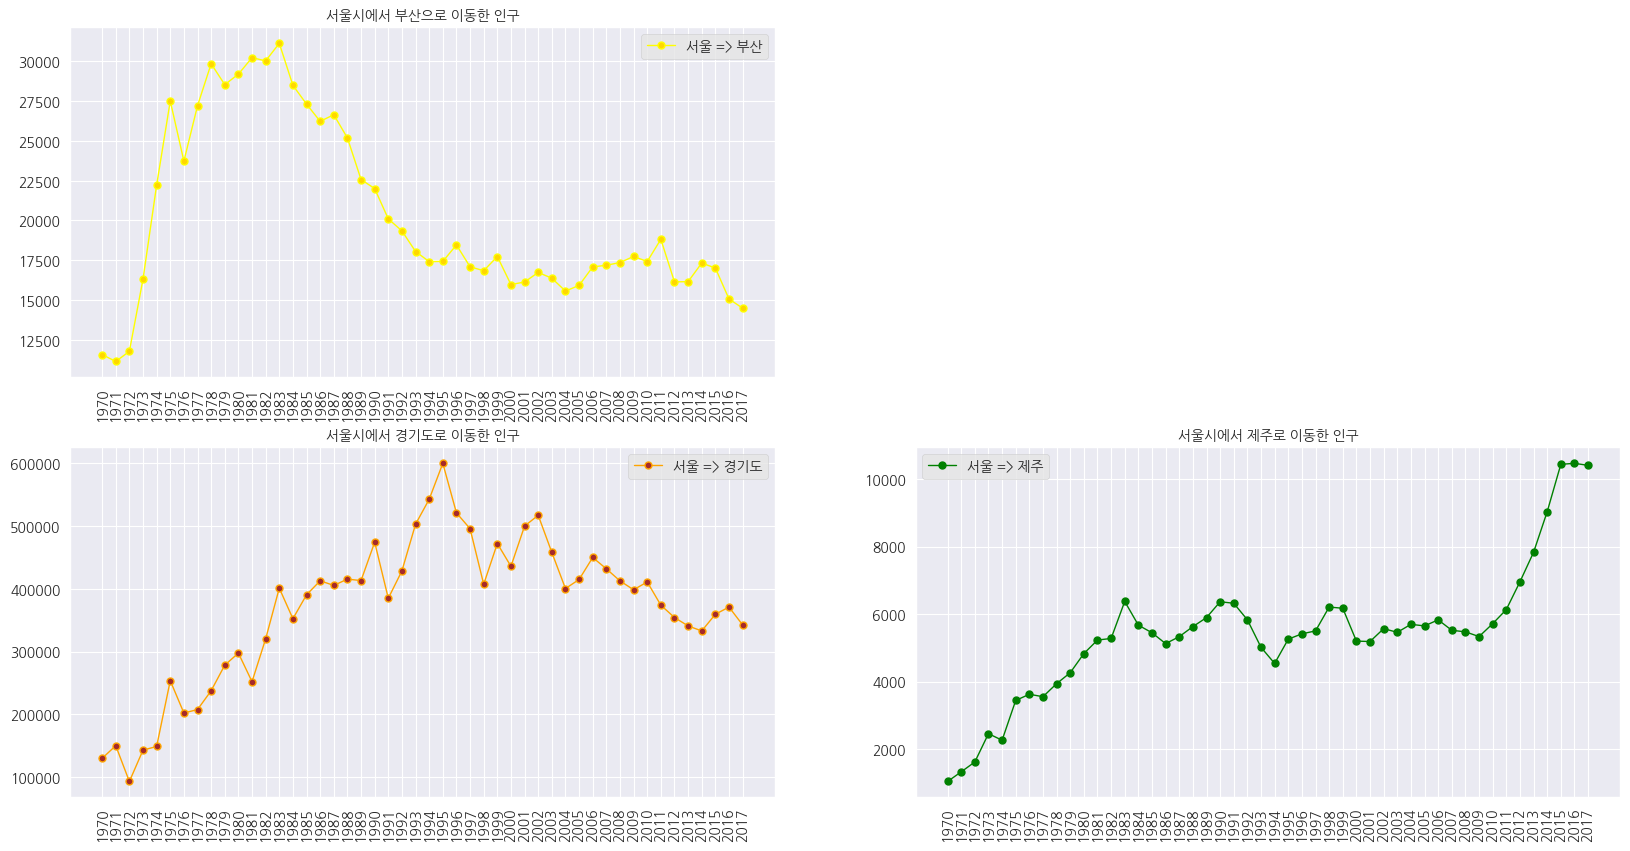

In [65]:
# %%
## 연습용
# 충남,경북,강원,전남
#print(df_seoul)
# 함수(함수,데이터)
#map(str,range(1970,2017+1))
col_years = list(map(str,range(1970,2017+1)))
df_4 = df_seoul.loc[["부산광역시","대구광역시","경기도","제주특별자치도"], col_years]
# 그래프 객체 만들기
fig = plt.figure(figsize=(20,10)) # 가로 사이즈
ax1 = fig.add_subplot(2,2,1)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
# axe 객체에 그래프 출력
ax1.plot(col_years,df_4.loc["부산광역시",:], marker = "o",
markerfacecolor = "gold", markersize = 5, color = "yellow",
linewidth = 1, label = "서울 => 부산" )
ax3.plot(col_years,df_4.loc["경기도",:], marker = "o",
markerfacecolor = "brown", markersize = 5, color = "orange",
linewidth = 1, label = "서울 => 경기도" )
ax4.plot(col_years,df_4.loc["제주특별자치도",:], marker = "o",
markerfacecolor = "green", markersize = 5, color = "green",
linewidth = 1, label = "서울 => 제주" )
# 스타일 서식
plt.style.use("ggplot")
# 범례
ax1.legend(loc = "best")
ax3.legend(loc = "best")
ax4.legend(loc = "best")
# x축 눈금 라벨 = 연도 회전시키기
ax1.set_xticklabels(col_years, rotation = 90)
ax3.set_xticklabels(col_years, rotation = 90)
ax4.set_xticklabels(col_years, rotation = 90)
# 차트 제목
ax1.set_title("서울시에서 부산으로 이동한 인구", size=10)
ax3.set_title("서울시에서 경기도로 이동한 인구", size=10)
ax4.set_title("서울시에서 제주로 이동한 인구", size=10)


<ipython-input-66-f6c11d0f357a>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation = 90)
<ipython-input-66-f6c11d0f357a>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation = 90)
<ipython-input-66-f6c11d0f357a>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation = 90)
<ipython-input-66-f6c11d0f357a>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation = 90)


(10000.0, 60000.0)

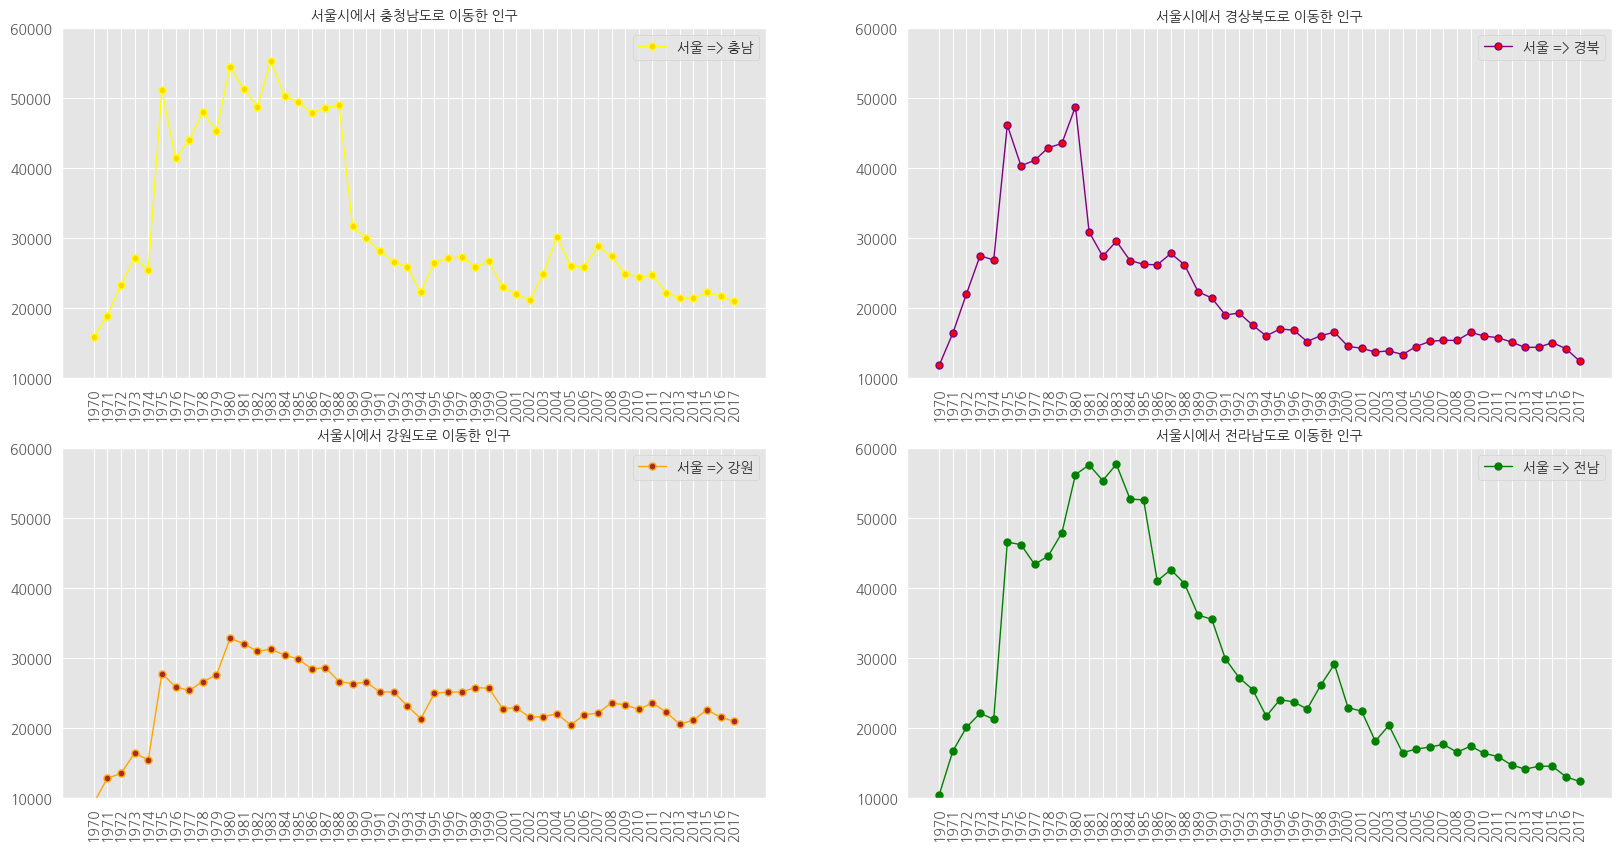

In [66]:
# %%
# 충남,경북,강원,전남
#print(df_seoul)
# 함수(함수,데이터)
#map(str,range(1970,2017+1))
col_years = list(map(str,range(1970,2017+1)))
df_4 = df_seoul.loc[["충청남도","경상북도","강원도","전라남도"], col_years]
# 그래프 객체 만들기
fig = plt.figure(figsize=(20,10)) # 가로 사이즈
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
# axe 객체에 그래프 출력
ax1.plot(col_years,df_4.loc["충청남도",:], marker = "o",
markerfacecolor = "gold", markersize = 5, color = "yellow",
linewidth = 1, label = "서울 => 충남" )
ax2.plot(col_years,df_4.loc["경상북도",:], marker = "o",
markerfacecolor = "red", markersize = 5, color = "purple",
linewidth = 1, label = "서울 => 경북" )
ax3.plot(col_years,df_4.loc["강원도",:], marker = "o",
markerfacecolor = "brown", markersize = 5, color = "orange",
linewidth = 1, label = "서울 => 강원" )
ax4.plot(col_years,df_4.loc["전라남도",:], marker = "o",
markerfacecolor = "green", markersize = 5, color = "green",
linewidth = 1, label = "서울 => 전남" )
# 스타일 서식
plt.style.use("ggplot")
# 범례
ax1.legend(loc = "best")
ax2.legend(loc = "best")
ax3.legend(loc = "best")
ax4.legend(loc = "best")
# x축 눈금 라벨 = 연도 회전시키기
ax1.set_xticklabels(col_years, rotation = 90)
ax2.set_xticklabels(col_years, rotation = 90)
ax3.set_xticklabels(col_years, rotation = 90)
ax4.set_xticklabels(col_years, rotation = 90)
# 차트 제목
ax1.set_title("서울시에서 충청남도로 이동한 인구", size=10)
ax2.set_title("서울시에서 경상북도로 이동한 인구", size=10)
ax3.set_title("서울시에서 강원도로 이동한 인구", size=10)
ax4.set_title("서울시에서 전라남도로 이동한 인구", size=10)
# 축 눈금 라벨 크기
ax1.tick_params(axis = "x", labelsize=10)    
ax1.tick_params(axis = "y", labelsize=10)
ax2.tick_params(axis = "x", labelsize=10)    
ax2.tick_params(axis = "y", labelsize=10)
ax3.tick_params(axis = "x", labelsize=10)    
ax3.tick_params(axis = "y", labelsize=10)
ax4.tick_params(axis = "x", labelsize=10)    
ax4.tick_params(axis = "y", labelsize=10)
# 축 범위
ax1.set_ylim(10000,60000)
ax2.set_ylim(10000,60000)
ax3.set_ylim(10000,60000)
ax4.set_ylim(10000,60000)

In [67]:
# %%
# 색상 이름 & 헥사 코드
import matplotlib
colors = {}
for name, code in matplotlib.colors.cnames.items():
    colors[name] = code
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

##면적 그래프

In [75]:
# %%
# 행과 열 전치
df_4 = df_4.T

Text(0, 0.5, '이동 인구 수')

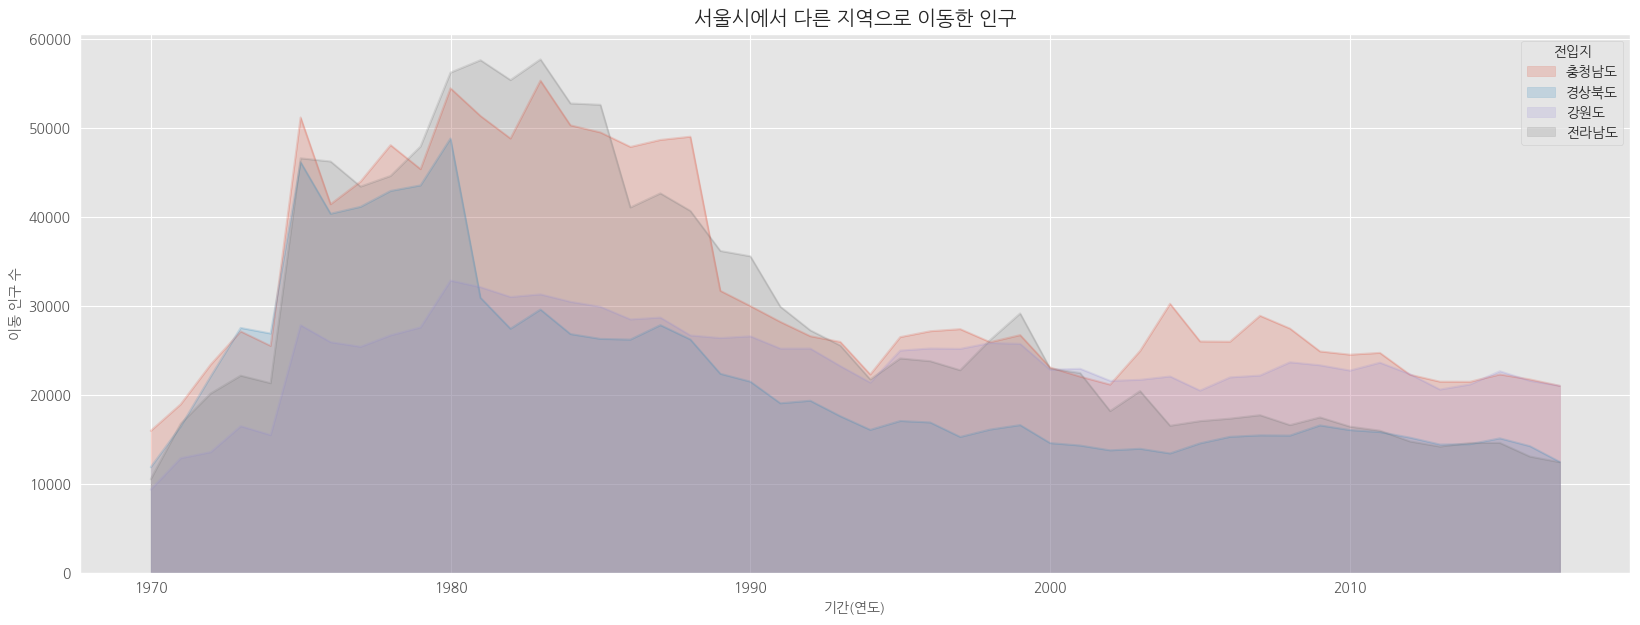

In [76]:
# %%
## 면적 그래프
df_4.plot(kind = "area",
          stacked=False,
          alpha = 0.2,
          figsize=(20,7))
# 차트 제목
plt.title("서울시에서 다른 지역으로 이동한 인구")
# 축 제목
plt.xlabel("기간(연도)", size = 10)
plt.ylabel("이동 인구 수", size = 10)

Text(0, 0.5, '이동 인구 수')

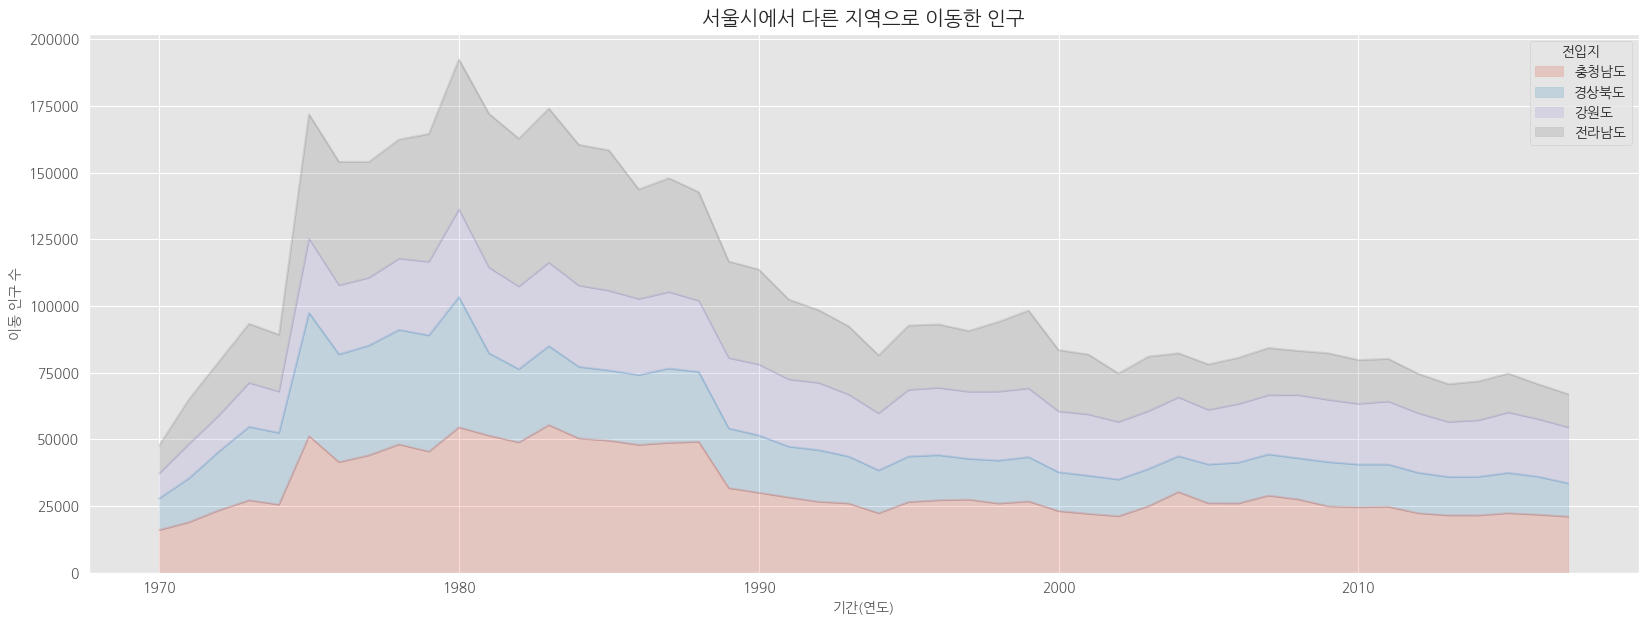

In [77]:
# %%
# 스타일 서식 지정
plt.style.use("ggplot")
## 면적 그래프 - 누적 시켜서 표현
df_4.plot(kind = "area",
          stacked=True,
          alpha = 0.2,
          figsize=(20,7))
# 차트 제목
plt.title("서울시에서 다른 지역으로 이동한 인구")
# 축 제목
plt.xlabel("기간(연도)", size = 10)
plt.ylabel("이동 인구 수", size = 10)

<class 'matplotlib.axes._axes.Axes'>


Text(0, 0.5, '이동 인구 수')

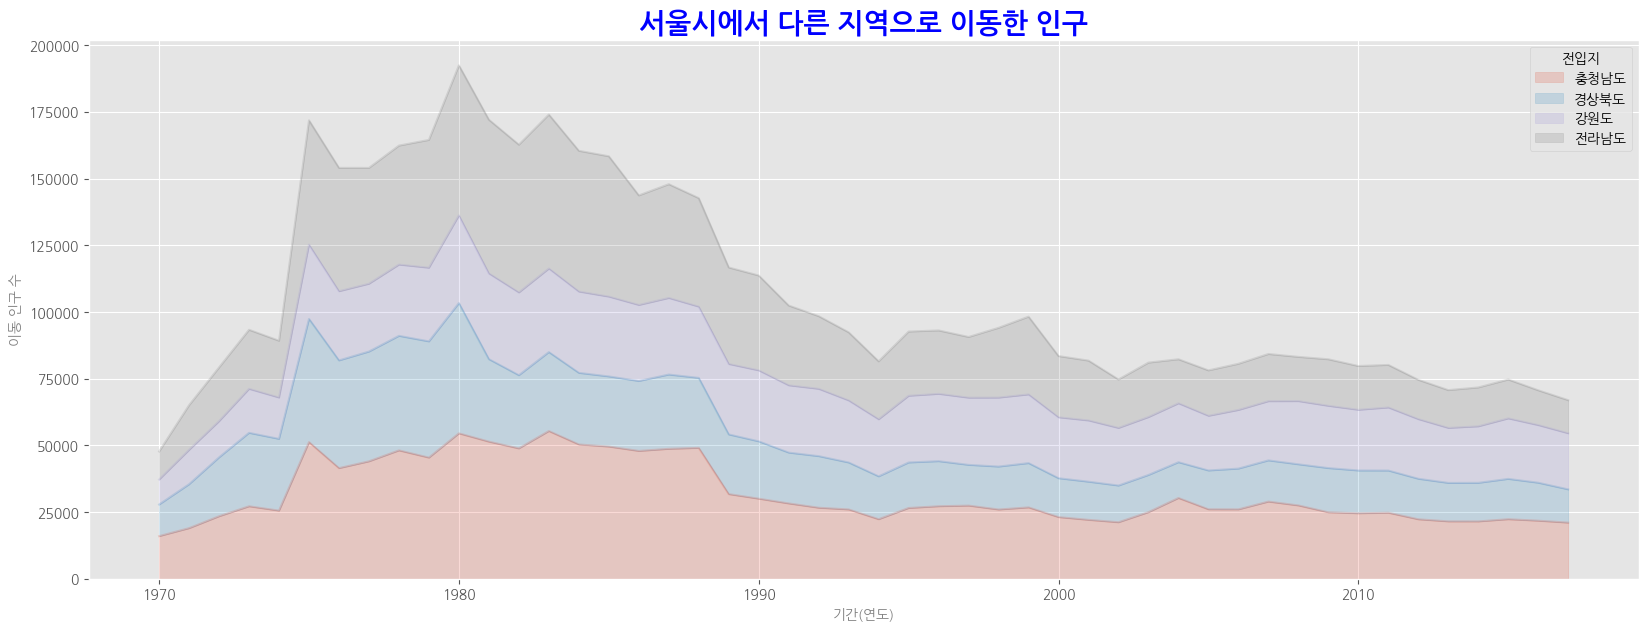

In [8]:
# %%
# axe 객체로 그려보기 (ax1 정의하여)
# 스타일 서식 지정
plt.style.use("ggplot")
## 면적 그래프 - 누적 시켜서 표현
ax1 = df_4.plot(kind = "area",
          stacked=True,
          alpha = 0.2,
          figsize=(20,7))
print(type(ax1))
# 차트 제목
ax1.set_title("서울시에서 다른 지역으로 이동한 인구", size=20, color="blue",
          weight = "bold")
# 축 제목
ax1.set_xlabel("기간(연도)", size = 10, color = "gray")
ax1.set_ylabel("이동 인구 수", size = 10, color = "gray")

Text(0, 0.5, '이동 인구 수')

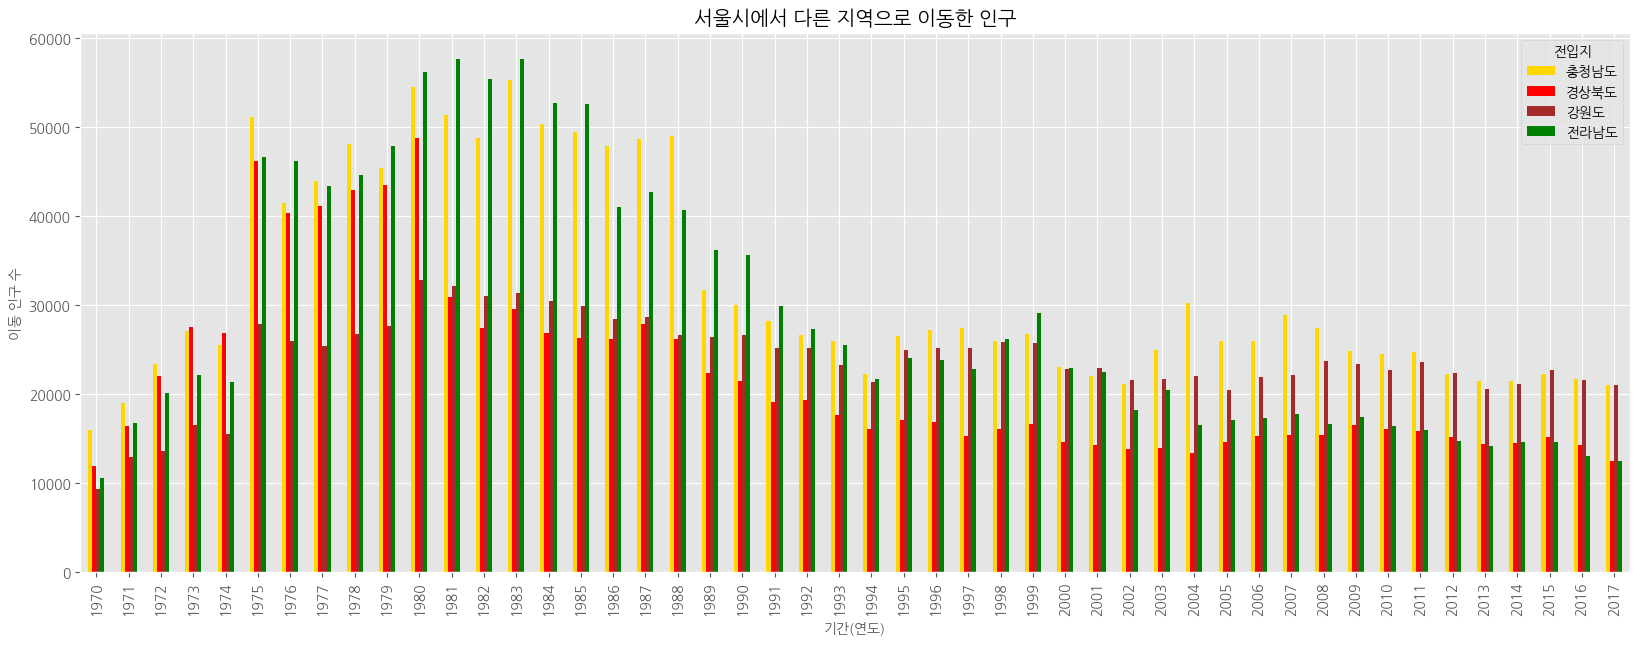

In [9]:
# %%
# 스타일 서식 지정
plt.style.use("ggplot")
## 세로형 막대 그래프
df_4.plot(kind = "bar",
          figsize=(20,7),
          width = 0.5,
          color = ["gold","red","brown","green"])
# 차트 제목
plt.title("서울시에서 다른 지역으로 이동한 인구")
# 축 제목
plt.xlabel("기간(연도)", size = 10)
plt.ylabel("이동 인구 수", size = 10)

In [11]:
#%%
# 2000년부터 데이터를 새로 추출
df_4_new = df_4.T.loc[:,"2000":].T

Text(0, 0.5, '이동 인구 수')

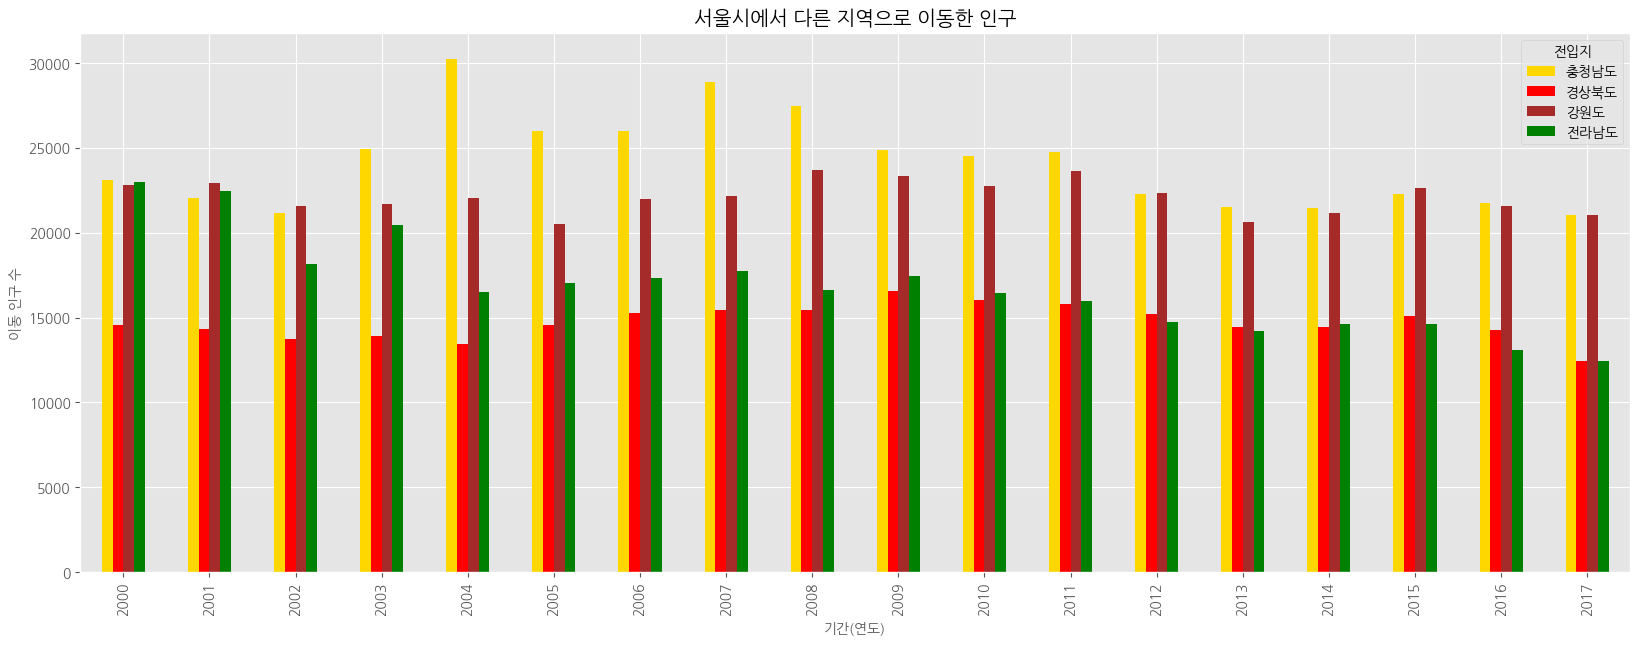

In [12]:
# %%
# 스타일 서식 지정
plt.style.use("ggplot")
## 세로형 막대 그래프
df_4_new.plot(kind = "bar",
          figsize=(20,7),
          width = 0.5,
          color = ["gold","red","brown","green"])
# 차트 제목
plt.title("서울시에서 다른 지역으로 이동한 인구")
# 축 제목
plt.xlabel("기간(연도)", size = 10)
plt.ylabel("이동 인구 수", size = 10)

<Axes: >

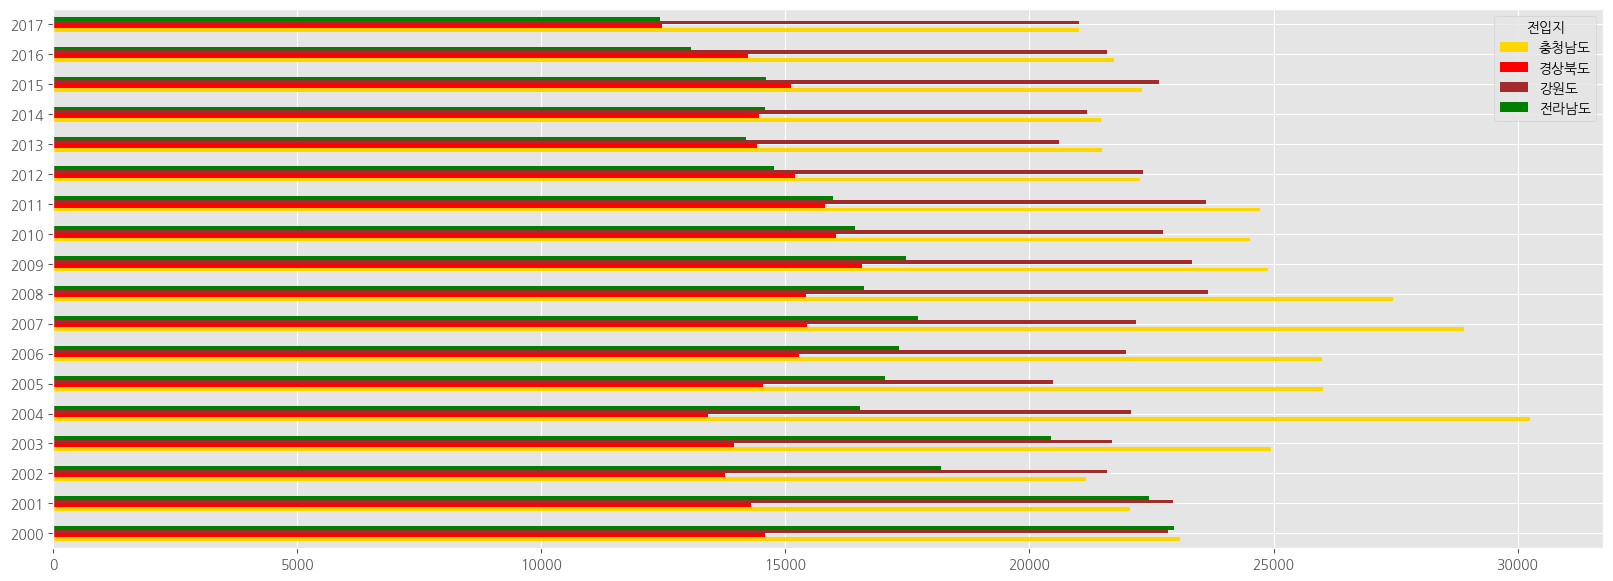

In [ ]:
# %%
## 가로형 막대 그래프
df_4_new.plot(kind = "barh",
          figsize=(20,7),
          width = 0.5,
          color = ["gold","red","brown","green"])


In [ ]:
# %%
df_4_new.T.sum(axis=0)
# 해당 코드는 DataFrame인 df_4_new의 행과 열을 전치(transpose)하여, 
# 열(axis=0)을 기준으로 합(sum)을 계산하는 코드입니다.

2000    83460
2001    81757
2002    74678
2003    81008
2004    82260
2005    78094
2006    80569
2007    84240
2008    83152
2009    82257
2010    79729
2011    80139
2012    74557
2013    70694
2014    71693
2015    74669
2016    70632
2017    66926
dtype: object

In [14]:
# %%
df_total = df_4_new.T  # DataFrame인 df_4_new의 행과 열을 전치하여 df_total 변수에 저장합니다.
df_total["합계"] = df_4_new.T.sum()  # 각 열(axis=0)의 합계를 계산하여 "합계" 열을 추가합니다.
df_total = df_total[["합계"]].sort_values(by="합계", ascending=True)  # "합계" 열을 기준으로 오름차순 정렬하여 df_total을 업데이트합니다.



Text(0, 0.5, '전입지')

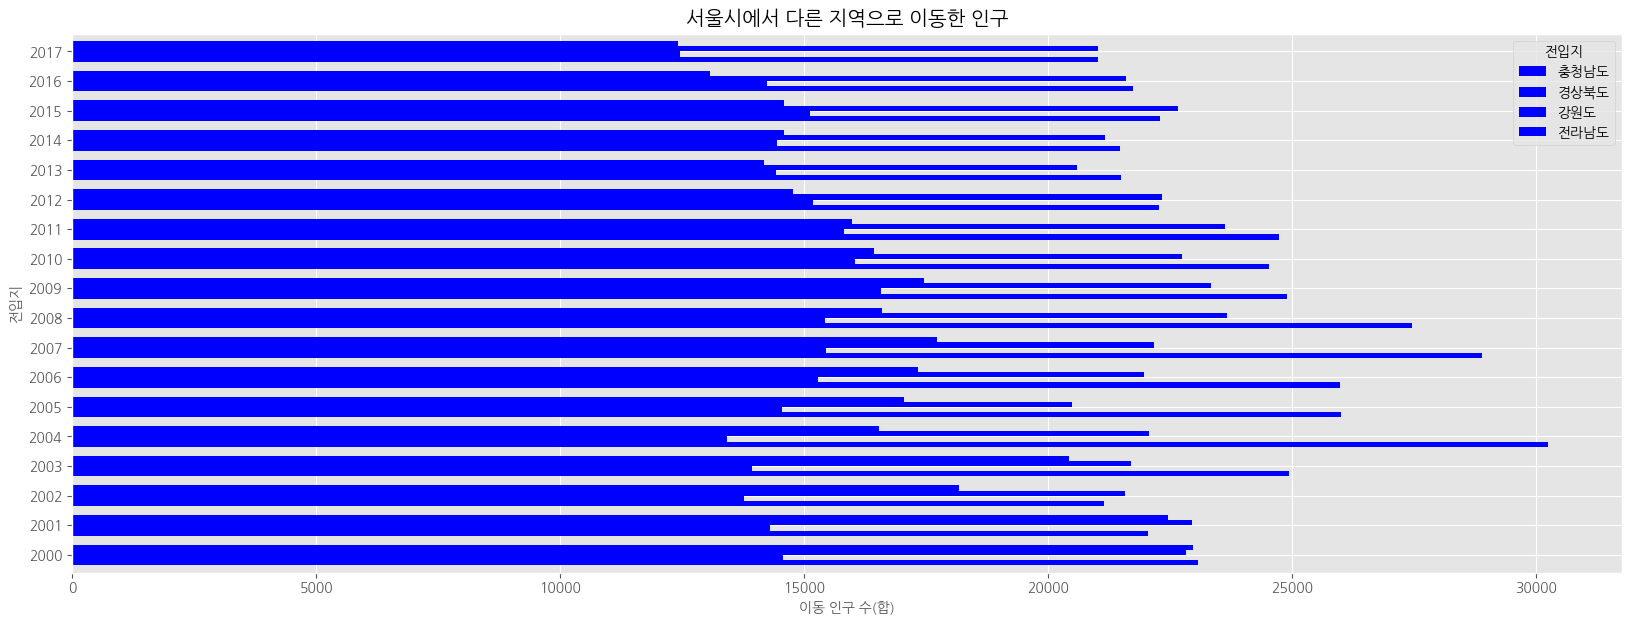

In [15]:
# %%
## 가로형 막대 그래프
df_4_new.plot(kind = "barh",
          figsize=(20,7),
          width = 0.7,
          color = "blue")
# 차트 제목
plt.title("서울시에서 다른 지역으로 이동한 인구")
# 축 제목
plt.xlabel("이동 인구 수(합)", size=10)
plt.ylabel("전입지", size=10)


## 2축 그래프 (보조축)

In [28]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
# 한글 폰트 지정
plt.rc("font", family = "NanumGothic")
# 데이터 불러오기
df = pd.read_excel("/content/drive/MyDrive/BDA/part4/남북한발전전력량.xlsx",
                   engine = "openpyxl")
# 북한 데이터 추출
df = df.iloc[5:]
df.drop("전력량 (억㎾h)", axis = "columns", inplace = True)
df.set_index("발전 전력별", inplace = True)
df = df.T

print(df)


발전 전력별   합계   수력   화력 원자력
1990    277  156  121   -
1991    263  150  113   -
1992    247  142  105   -
1993    221  133   88   -
1994    231  138   93   -
1995    230  142   88   -
1996    213  125   88   -
1997    193  107   86   -
1998    170  102   68   -
1999    186  103   83   -
2000    194  102   92   -
2001    202  106   96   -
2002    190  106   84   -
2003    196  117   79   -
2004    206  125   81   -
2005    215  131   84   -
2006    225  126   99   -
2007    236  133  103   -
2008    255  141  114   -
2009    235  125  110   -
2010    237  134  103   -
2011    211  132   79   -
2012    215  135   80   -
2013    221  139   82   -
2014    216  130   86   -
2015    190  100   90   -
2016    239  128  111   -


In [32]:
# 증감율 계산
df = df.rename(columns = {"합계": "총발전량"})
df["전년총발전량"] = df["총발전량"].shift(1)
df["증감율"] = ((df["총발전량"] - df["전년총발전량"])/df["전년총발전량"])*100
print(df.index)
print(df)

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')
발전 전력별 총발전량   수력   화력 원자력 전년총발전량        증감율
1990    277  156  121   -   None        NaN
1991    263  150  113   -    277  -5.054152
1992    247  142  105   -    263   -6.08365
1993    221  133   88   -    247 -10.526316
1994    231  138   93   -    221   4.524887
1995    230  142   88   -    231    -0.4329
1996    213  125   88   -    230  -7.391304
1997    193  107   86   -    213  -9.389671
1998    170  102   68   -    193 -11.917098
1999    186  103   83   -    170   9.411765
2000    194  102   92   -    186   4.301075
2001    202  106   96   -    194   4.123711
2002    190  106   84   -    202  -5.940594
2003    196  117   79   -    190   3.157895
2004    206  125   81   -    196   5.102041
2005    215  131   84   -    206   4

Text(0.5, 1.0, '북한 전력 발전량')

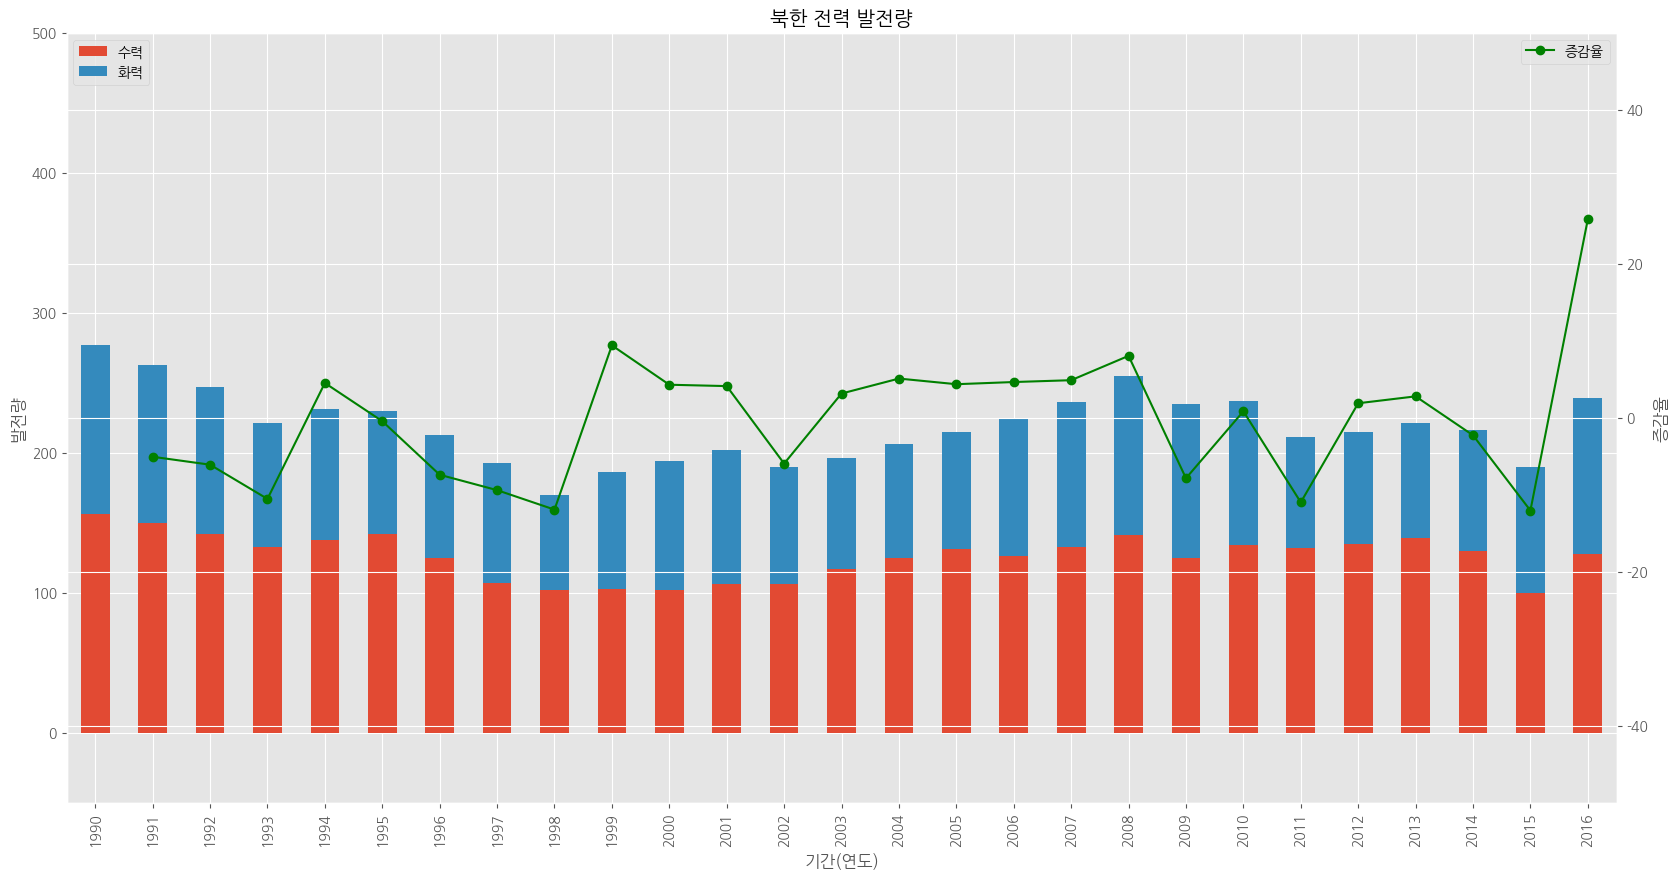

In [34]:
# 마이너스 부호를 출력해야 되는 경우
plt.rcParams["axes.unicode_minus"] = False
# 수력, 화력
ax1 = df[["수력","화력"]].plot(kind = "bar",figsize = (20,10),stacked = True)
ax2 = ax1.twinx()
ax2.plot(df.index,df["증감율"], color = "green", marker = "o", 
         label = "증감율")
# 축 조정
ax1.set_ylim(-50, 500)
ax2.set_ylim(-50, 50)
# 축 제목
ax1.set_xlabel("기간(연도)")
ax1.set_ylabel("발전량")
ax2.set_ylabel("증감율")
# 범례
ax1.legend(loc = "upper left")
ax2.legend(loc = "best")
# 차트 제목
plt.title("북한 전력 발전량")

## 히스토그램

In [35]:
# %%
## 히스토그램
# 라이브러리 불러오기
import pandas as pd
# 데이터 불러오기
df = pd.read_csv(r"/content/drive/MyDrive/BDA/part3/auto-mpg.csv", header=None)
print(df)
# 열 이름 지정
df.columns = ["mpg", "cylinders", "displacement","horsepower", "weight",
              "accleration","model year","origin","name"]
print(df)

        0  1      2      3       4     5   6  7                          8
0    18.0  8  307.0  130.0  3504.0  12.0  70  1  chevrolet chevelle malibu
1    15.0  8  350.0  165.0  3693.0  11.5  70  1          buick skylark 320
2    18.0  8  318.0  150.0  3436.0  11.0  70  1         plymouth satellite
3    16.0  8  304.0  150.0  3433.0  12.0  70  1              amc rebel sst
4    17.0  8  302.0  140.0  3449.0  10.5  70  1                ford torino
..    ... ..    ...    ...     ...   ...  .. ..                        ...
393  27.0  4  140.0  86.00  2790.0  15.6  82  1            ford mustang gl
394  44.0  4   97.0  52.00  2130.0  24.6  82  2                  vw pickup
395  32.0  4  135.0  84.00  2295.0  11.6  82  1              dodge rampage
396  28.0  4  120.0  79.00  2625.0  18.6  82  1                ford ranger
397  31.0  4  119.0  82.00  2720.0  19.4  82  1                 chevy s-10

[398 rows x 9 columns]
      mpg  cylinders  displacement horsepower  weight  accleration  \
0    1

Text(0.5, 0, '연비')

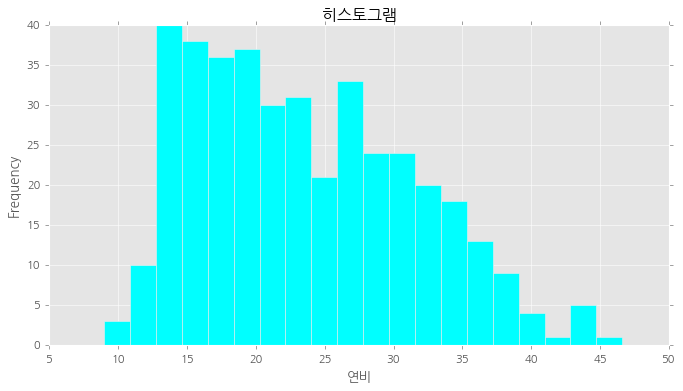

In [40]:
# 한글 폰트 지정
plt.rc("font", family = "NanumGothic")
# 스타일 서식
plt.style.use("ggplot")
# 히스토그램
df["mpg"].plot(kind = "hist", bins = 20, color = "aqua", figsize = (10,5))
# 차트 제목 추가
plt.title("히스토그램")
# 축 제목 추가
plt.xlabel("연비")

## 산점도 분석

      mpg  cylinders  displacement horsepower  weight  accleration  \
0    18.0          8         307.0      130.0  3504.0         12.0   
1    15.0          8         350.0      165.0  3693.0         11.5   
2    18.0          8         318.0      150.0  3436.0         11.0   
3    16.0          8         304.0      150.0  3433.0         12.0   
4    17.0          8         302.0      140.0  3449.0         10.5   
..    ...        ...           ...        ...     ...          ...   
393  27.0          4         140.0      86.00  2790.0         15.6   
394  44.0          4          97.0      52.00  2130.0         24.6   
395  32.0          4         135.0      84.00  2295.0         11.6   
396  28.0          4         120.0      79.00  2625.0         18.6   
397  31.0          4         119.0      82.00  2720.0         19.4   

     model year  origin                       name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  


Text(0.5, 1.0, '산점도 분석')

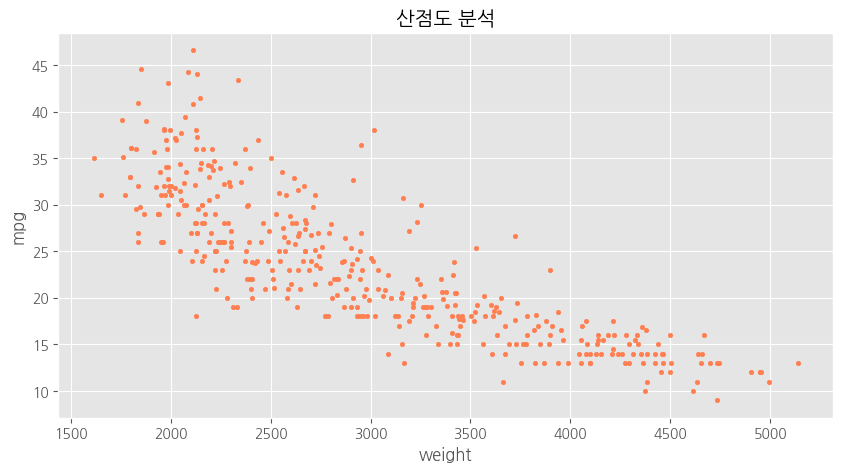

In [45]:
# 산점도 그리기
# 산점도 데이터
print(df)
# 한글 폰트 지정
plt.rc("font", family = "NanumGothic")
# 스타일 서식
plt.style.use("ggplot")
df.plot(kind="scatter",
        x="weight",
        y="mpg",
        c="coral",
        s=10,
        figsize=(10,5))
plt.title("산점도 분석")


      mpg  cylinders  displacement horsepower  weight  accleration  \
0    18.0          8         307.0      130.0  3504.0         12.0   
1    15.0          8         350.0      165.0  3693.0         11.5   
2    18.0          8         318.0      150.0  3436.0         11.0   
3    16.0          8         304.0      150.0  3433.0         12.0   
4    17.0          8         302.0      140.0  3449.0         10.5   
..    ...        ...           ...        ...     ...          ...   
393  27.0          4         140.0      86.00  2790.0         15.6   
394  44.0          4          97.0      52.00  2130.0         24.6   
395  32.0          4         135.0      84.00  2295.0         11.6   
396  28.0          4         120.0      79.00  2625.0         18.6   
397  31.0          4         119.0      82.00  2720.0         19.4   

     model year  origin                       name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  


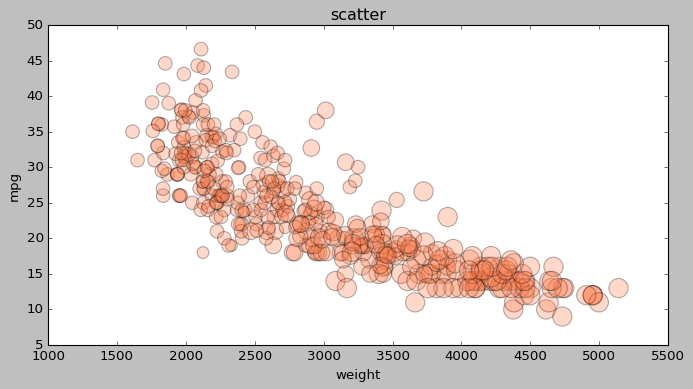

In [ ]:
#%%
# 버블 차트
print(df)
# 스타일 서식
plt.style.use("classic")
# 3번째 변수 처리
cy = df.cylinders/df.cylinders.max()*300

# 산점도 그리기
print(df.cylinders)
df.plot(kind="scatter",x="weight",y="mpg",c="coral",
        s=cy,
        alpha = 0.3,
        figsize=(10,5))
plt.title("scatter")
# 파일로 저장
plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent=True)


## 상자 그림

In [50]:
#%%
# 스타일 서식
plt.style.use("ggplot")
df["count"]=1
df_origin = df.groupby("origin").sum()
df_origin.index = ["USA","EU","JAPAN"]
print(df_origin.head())

          mpg  cylinders  displacement    weight  accleration  model year  \
USA    5000.8       1556       61229.5  837121.0       3743.4       18827   
EU     1952.4        291        7640.0  169631.0       1175.1        5307   
JAPAN  2405.6        324        8114.0  175477.0       1277.6        6118   

       count  
USA      249  
EU        70  
JAPAN     79  


<ipython-input-50-0c14dc50dee9>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_origin = df.groupby("origin").sum()


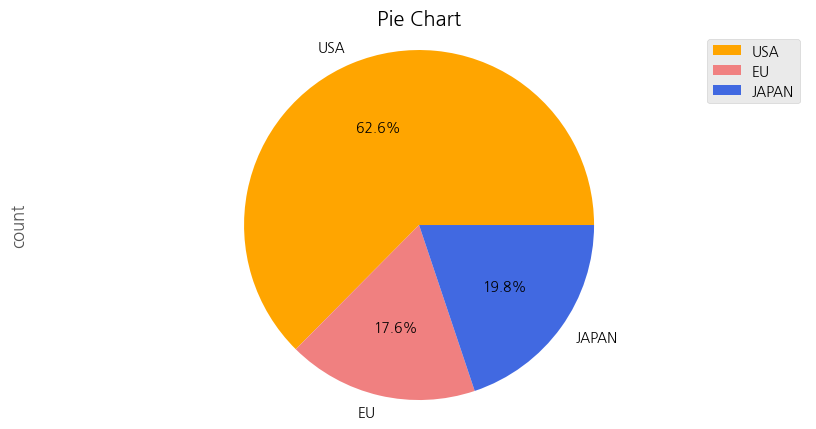

In [51]:
# 스타일 서식
plt.style.use("ggplot")
# 파이 차트
df_origin["count"].plot(kind = "pie", figsize = (10,5), autopct = "%1.1f%%",
                        colors = ["orange","lightcoral","royalblue"],
                        startangle = 0)
# 제목 추가
plt.title("Pie Chart")
# 원에 가깝게 표현
plt.axis("equal")
# 범례 추가
plt.legend(loc = "upper right")

# 파이차트는 빈도를 만드는게 포인트다.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4a52590040>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4a52590580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4a52582d60>,
 'medians': [<matplotlib.lines.Line2D at 0x7f4a52590ac0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4a52590d60>,
 'means': []}

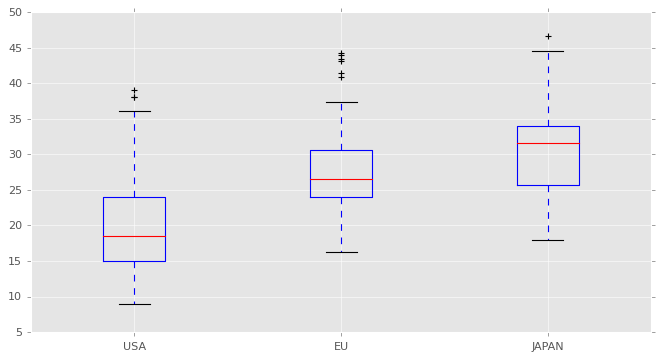

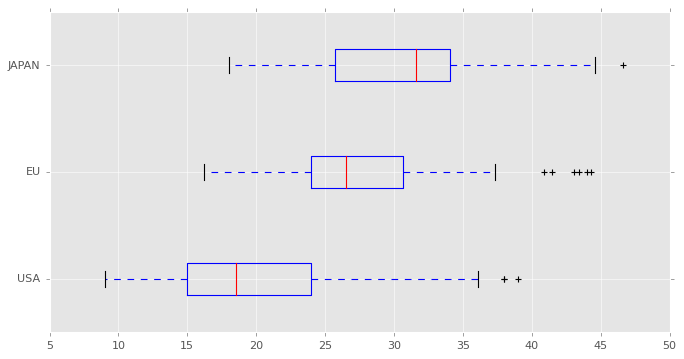

In [ ]:
# %%
# 상자그림
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax1.boxplot(x=[df[df["origin"]==1]["mpg"],
           df[df["origin"]==2]["mpg"],
           df[df["origin"]==3]["mpg"]],
           labels=["USA","EU","JAPAN"])

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax2.boxplot(x=[df[df["origin"]==1]["mpg"],
           df[df["origin"]==2]["mpg"],
           df[df["origin"]==3]["mpg"]],
           labels=["USA","EU","JAPAN"],
           vert = False) # 상자그림을 가로로


In [ ]:
# %%
# 컬러맵
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [ ]:
# %%
# 스타일 시트
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
# %%
# 파이썬 그래프 샘플이나 코드 제공
# 파이썬 그래프 갤러리
# https://www.python-graph-gallery.com/

## Seaborn 라이브러리

### 데이터 준비

In [ ]:
# %%
## Seaborn 라이브러리
### 데이터 준비
import seaborn as sns
titanic = sns.load_dataset("titanic")
print("titanic.head()")
print("titanic.info()")

titanic.head()
titanic.info()


<Axes: xlabel='age', ylabel='fare'>

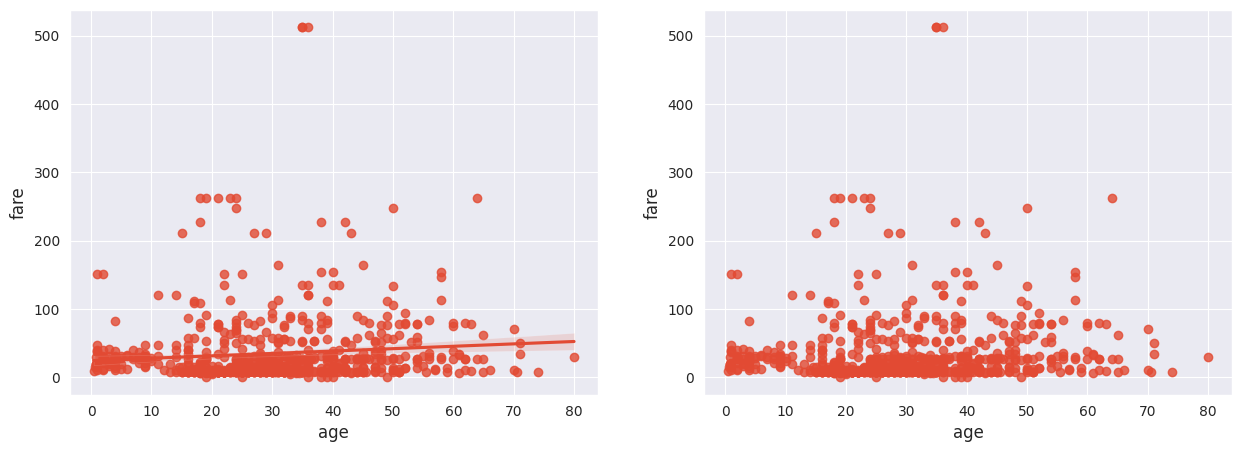

In [54]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 테마
sns.set_style("darkgrid")

titanic = sns.load_dataset("titanic")
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)   

sns.regplot(x="age",
            y="fare",
            data=titanic,
            ax=ax1)

sns.regplot(x="age",
            y="fare",
            data=titanic,
            ax=ax2,
            fit_reg=False)


<ipython-input-56-b11c35a057df>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic["fare"], ax = ax1)


Text(0.5, 1.0, 'histogram')

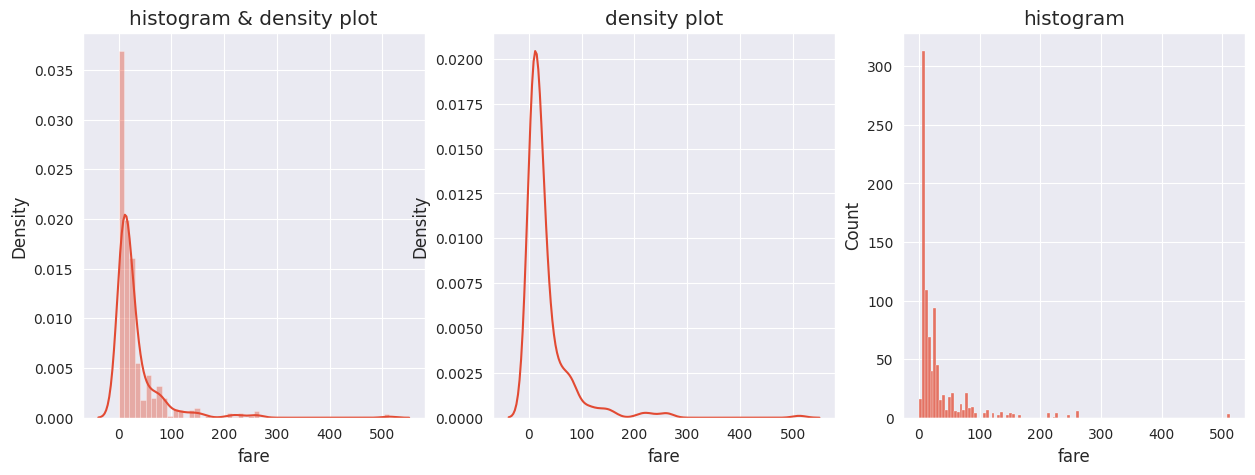

In [56]:
## 히스토그램, 커널밀도함수

# 그래프 객체 생성
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
# 히스토그램 + 커널밀도함수
sns.distplot(titanic["fare"], ax = ax1)
# 커널밀도함수
sns.kdeplot(titanic["fare"], ax = ax2)
# 히스토그램
sns.histplot(titanic["fare"], ax = ax3)
# 제목 추가
ax1.set_title("histogram & density plot")
ax2.set_title("density plot")
ax3.set_title("histogram")